<a href="https://colab.research.google.com/github/linhsuan519/titanic-analysis/blob/main/3_%E9%90%B5%E9%81%94%E5%B0%BC%E8%99%9F%E7%9A%84%E5%AD%98%E6%B4%BB%E9%A0%90%E6%B8%AC_%E5%84%AA%E5%8C%96%E8%B3%87%E6%96%99%E9%9B%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A. 在資料分析的工作流程中，在不考慮準確度情況下有哪些必備的環節？
1. 取得資料 - 資料收集、讀取、儲存
2. 資料前處理 - 資料清理、型態轉換、資料探索、視覺化、特徵工程
3. 模型訓練
4. 模型評估
5. 應用決策

B. 接下來請在不考慮準確度的前提下完成 Baseline ，讓已讀入的資料完成必要的資料前處理的操作。

#載入資料
資料網址：https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/train.csv%EF%BC%89

In [26]:
import pandas as pd
url = 'https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/train.csv'
df = pd.read_csv(url)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#觀察資料與評估資訊


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [28]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [29]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [30]:
cor = df.corr()
cor

<ipython-input-30-150a9db5d4b2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


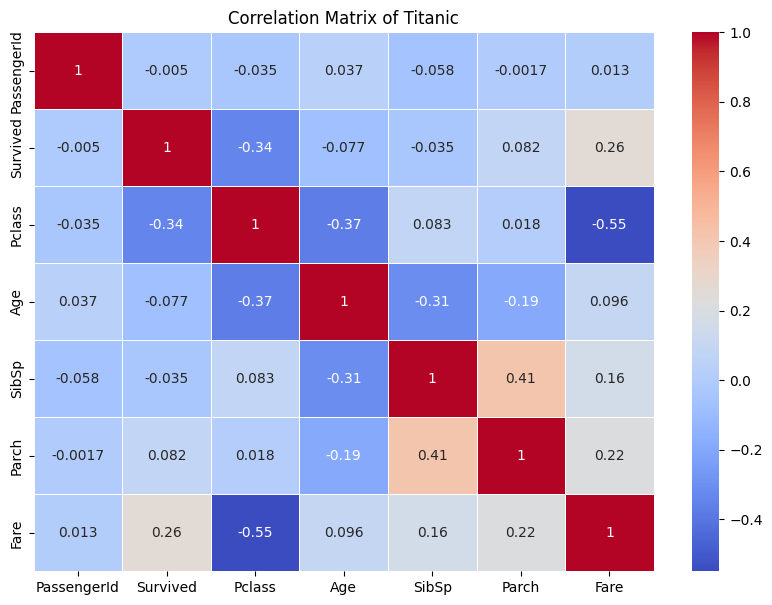

In [31]:
# 使用seaborn和matplotlib，視覺化呈現相關性
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
sns.heatmap(cor,annot=True,linewidth=0.5,cmap='coolwarm')
plt.title('Correlation Matrix of Titanic')
plt.show()

#資料前處理
1.缺失項

2.對分析無幫助之資訊


In [32]:
titanic = df.copy()
titanic.dropna(inplace=True)
titanic.drop(columns=['Name','Ticket','Cabin'],axis=1,inplace=True)

3.轉換成可執行的資料(數值化)


In [33]:
df_train = pd.get_dummies(titanic,columns=['Sex','Embarked'],dtype=int)
df_train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
6,7,0,1,54.0,0,0,51.8625,0,1,0,0,1
10,11,1,3,4.0,1,1,16.7000,1,0,0,0,1
11,12,1,1,58.0,0,0,26.5500,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,47.0,1,1,52.5542,1,0,0,0,1
872,873,0,1,33.0,0,0,5.0000,0,1,0,0,1
879,880,1,1,56.0,0,1,83.1583,1,0,1,0,0
887,888,1,1,19.0,0,0,30.0000,1,0,0,0,1


#模型分析

1.定義特徵欄位X、目標欄位Y，並完成訓練集資料

In [34]:
columns_X = set(df_train.columns) - {'Survived'}
columns_y = ['Survived']

train_X = df_train[columns_X]
train_y = df_train[columns_y]

<ipython-input-34-8b838da6cdaa>:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  train_X = df_train[columns_X]


2.使用 Logistic Regression 模型，進行交叉驗證以評估準確度

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log = LogisticRegression(random_state=0,max_iter=3000)
scores = cross_val_score(log,train_X,train_y.values.ravel(),cv=5,scoring='accuracy')
print(scores)
print(scores.mean())

[0.75675676 0.83783784 0.7027027  0.66666667 0.69444444]
0.7316816816816816


#結論
精準度約為0.74




#優化
觀察特徵參數


**結論**

1. Fare : 票價越高越容易活

2. Age : 幼年及老年容易被優先搶救

3. Sex : 女性遠高於男性

4. Pclass : 艙等月高搶救越及時

5. Embarked : C > Q > S

In [36]:
# 定義distribution函數，以KDE圖觀察欄位與Survived之間的關係

def distribution(df,var,target,**kwargs):
  # 設定row和col參數
  row = kwargs.get('row',None)
  col = kwargs.get('col',None)

  # 使用seaborn函數製圖
  facet = sns.FacetGrid(df,row=row,col=col,hue=target,aspect=3)
  facet.map(sns.kdeplot,var,fill=True)
  facet.set(xlim=(0,df[var].max()))
  facet.add_legend()

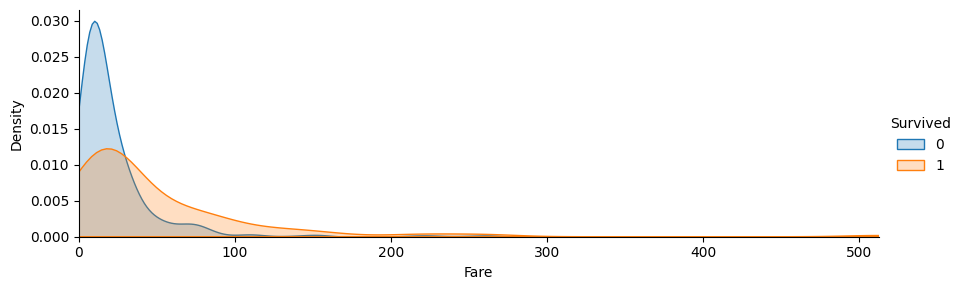

In [37]:
# 觀察Fare和Survived的關係
distribution(df,var='Fare',target='Survived')
plt.show()

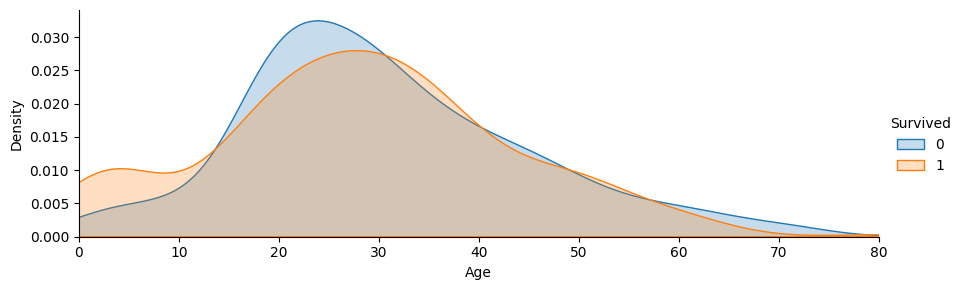

In [38]:
# 觀察Age和Survived的關係
distribution(df,var='Age',target='Survived')
plt.show()

In [39]:
# 定義categories函數，以長條圖觀察欄位與Survived之間的關係

def categories(df,cat,target,**kwargs):
  # 設定row和col參數
  row = kwargs.get('row',None)
  col = kwargs.get('col',None)

  # 使用seaborn函數製圖
  facet = sns.FacetGrid(df,row=row,col=col)
  facet.map(sns.barplot,cat,target,color='lightblue')
  facet.add_legend()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


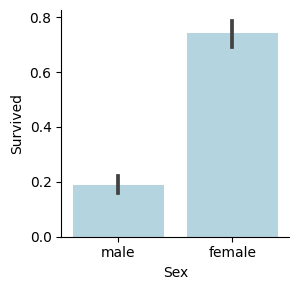

In [40]:
# 觀察Sex和Survived的關係
categories(df,cat='Sex',target='Survived')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


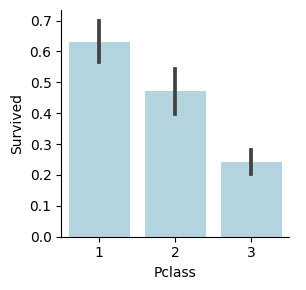

In [41]:
# 觀察Pclass和Survived的關係
categories(df,cat='Pclass',target='Survived')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


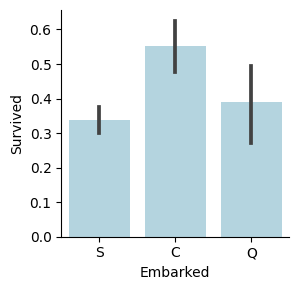

In [42]:
# 觀察Embarked和Survived的關係
categories(df,cat='Embarked',target='Survived')
plt.show()

#資料處理
1.刪除多於欄位


* PassengerId : 僅用以辨識乘客
* Name : 危機時期，比較不可能出現唱名救援
* Ticket : 船票編號僅代表購買順序或核對資訊
* Cabin : 欄位中的缺失值(687)佔全體(891)中的77%



In [57]:
titanic = df.copy()
titanic.drop(columns=['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

2.資料數值化


* LabelEncoder : 因欄位資料並非有序類別，故不考慮使用
* OneHotEncoder : 拆分Embarked為「Embarked_C、Embarked_Q、Embarked_S」



In [58]:
# Sex直接轉換
titanic['Sex'] = titanic['Sex'].replace({'male':0,'female':1})

# Embarked使用OneHotEncoder
titanic = pd.get_dummies(titanic,columns=['Embarked'],dtype=int)

In [56]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0,0,1
887,1,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,1,NaN,1,2,23.4500,0,0,1
889,1,1,0,26.0,0,0,30.0000,1,0,0


#缺失項處理
 **多種策略處理Age 缺失值**

* titanic_del：全部刪除
* titanic_mean：平均數填補缺
* titanic_median：中位數填補
* titanic_mode：眾數填補





In [49]:
# 全部刪除
titanic_del = titanic.copy()
titanic_del.dropna(subset=['Age'],inplace=True)

# 使用平均數填補
titanic_mean = titanic.copy()
titanic_mean['Age'].fillna(titanic_mean['Age'].mean(),inplace=True)

# 使用中位數填補
titanic_median = titanic.copy()
titanic_median['Age'].fillna(titanic_median['Age'].median(),inplace=True)

# 使用眾數填補
titanic_mode = titanic.copy()
titanic_mode['Age'].fillna(titanic_mode['Age'].mode()[0],inplace=True)


#模型分析


**結論**
以眾數處理Age缺失值準確率最高

In [65]:
#titanic_del
columns_X = set(titanic_del.columns) - {'Survived'}
columns_y = ['Survived']

train_X = titanic_del[list(columns_X)]
train_y = titanic_del[columns_y]

# 使用 Logistic Regression 模型，進行交叉驗證以評估準確度
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log = LogisticRegression(random_state=0,max_iter=3000)
scores_del = cross_val_score(log,train_X,train_y.values.ravel(),cv=5,scoring='accuracy')
print(scores_del)
print(scores_del.mean())

[0.74825175 0.82517483 0.76923077 0.76223776 0.82394366]
0.7857677533733871


In [66]:
#titanic_mean
columns_X = set(titanic_mean.columns) - {'Survived'}
columns_y = ['Survived']

train_X = titanic_mean[list(columns_X)]
train_y = titanic_mean[columns_y]

# 使用 Logistic Regression 模型，進行交叉驗證以評估準確度
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log = LogisticRegression(random_state=0,max_iter=3000)
scores_mean = cross_val_score(log,train_X,train_y.values.ravel(),cv=5,scoring='accuracy')
print(scores_mean)
print(scores_mean.mean())

[0.78212291 0.78089888 0.78651685 0.76966292 0.8258427 ]
0.789008850668508


In [67]:
#titanic_median
columns_X = set(titanic_median.columns) - {'Survived'}
columns_y = ['Survived']

train_X = titanic_median[list(columns_X)]
train_y = titanic_median[columns_y]

# 使用 Logistic Regression 模型，進行交叉驗證以評估準確度
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log = LogisticRegression(random_state=0,max_iter=3000)
scores_median = cross_val_score(log,train_X,train_y.values.ravel(),cv=5,scoring='accuracy')
print(scores_median)
print(scores_median.mean())

[0.77653631 0.78651685 0.78651685 0.76966292 0.8258427 ]
0.7890151277383717


In [68]:
#titanic_mode
columns_X = set(titanic_mode.columns) - {'Survived'}
columns_y = ['Survived']

train_X = titanic_mode[list(columns_X)]
train_y = titanic_mode[columns_y]

# 使用 Logistic Regression 模型，進行交叉驗證以評估準確度
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log = LogisticRegression(random_state=0,max_iter=3000)
scores_mode = cross_val_score(log,train_X,train_y.values.ravel(),cv=5,scoring='accuracy')
print(scores_mode)
print(scores_mode.mean())

[0.7877095  0.78651685 0.78089888 0.76966292 0.83146067]
0.7912497646098802


In [69]:
scores = {'strategy':['titanic_del','titanic_mean','titanic_median','titanic_mode'],
        'accuracy':[scores_del.mean(),scores_mean.mean(),scores_median.mean(),scores_mode.mean()]}
compared = pd.DataFrame(scores)
compared.sort_values(by='accuracy',ascending=False)

,strategy,accuracy
3,titanic_mode,0.791250
2,titanic_median,0.789015
1,titanic_mean,0.789009
0,titanic_del,0.785768


#結論
1. 資料分析(EDA)
* Fare : 票價越高越容易活
* Age : 幼年及老年容易被優先搶救
* Sex : 女性遠高於男性
* Pclass : 艙等月高搶救越及時
* Embarked : C > Q > S
2. 模型選擇 :
在多種缺失值處理策略中，以眾數填補的 Accuracy 約為0.79，相對較高










#